## Initialisation

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
cpcp_air_pollution_data = pd.read_csv("./Data/Data.csv")
ncap_funding_data = pd.read_csv("./Data/NCAP_Funding.csv")
state_data = pd.read_csv("./Data/State_Data.csv")

## Spatial Aggregation

#### 1) Which state(consider all the stations in that state) has the highest average PM2.5 concentration across all stations and across all years?

In [6]:
cpcp_air_pollution_data_state_groupby = cpcp_air_pollution_data.groupby("state")
print(cpcp_air_pollution_data_state_groupby.agg({"PM2.5": "mean"}).sort_values("PM2.5", ascending=False).iloc[0].name+" has the highest PM2.5 value across all years")


Delhi has the highest PM2.5 value across all years


#### 2) Which state (consider all stations in that state) had the most days with hazardous PM2.5 levels (above 300 µg/m³) for the year 2023?

In [8]:
cpcp_air_pollution_data["Timestamp"] = pd.to_datetime(cpcp_air_pollution_data["Timestamp"])
start_date = '2023-01-01'
end_date = '2023-12-31'
date_mask = (cpcp_air_pollution_data['Timestamp'] >= start_date) & (cpcp_air_pollution_data['Timestamp'] <= end_date)
cpcp_air_pollution_data_year_2023 = cpcp_air_pollution_data.loc[date_mask]
pm_mask = cpcp_air_pollution_data_year_2023["PM2.5"] > 300
print(cpcp_air_pollution_data_year_2023.loc[pm_mask].groupby("state").agg({"PM2.5": "count"}).sort_values("PM2.5", ascending=False).iloc[0].name+" has the highest number of days with PM2.5 greater than 300 in 2023")


Delhi has the highest number of days with PM2.5 greater than 300 in 2023


#### 3)Which state has the highest variability in PM2.5 levels across its monitoring stations in 2023?

In [10]:
cpcp_air_pollution_data_year_2023_state_std = cpcp_air_pollution_data_year_2023.groupby("state").agg({"PM2.5":"std"})
print(cpcp_air_pollution_data_year_2023_state_std.sort_values("PM2.5", ascending=False).iloc[0].name+" has the highest variance of PM2.5 in 2023")

Delhi has the highest variance of PM2.5 in 2023


#### 4)Which state has the lowest average PM2.5 levels during the Covid period (The year 2020-2021 both years inclusive)?


In [12]:
start_date = '2020-01-01'
end_date = '2021-12-31'
date_mask = (cpcp_air_pollution_data['Timestamp'] >= start_date) & (cpcp_air_pollution_data['Timestamp'] <= end_date)
cpcp_air_pollution_data_year_2020_2021 = cpcp_air_pollution_data.loc[date_mask]
cpcp_air_pollution_data_year_2020_2021_state_groupby = cpcp_air_pollution_data_year_2020_2021.groupby("state")
cpcp_air_pollution_data_year_2020_2021_state_lowest_mean = cpcp_air_pollution_data_year_2020_2021_state_groupby.agg({"PM2.5": "mean"}).sort_values("PM2.5", ascending=True).iloc[0].name

print(cpcp_air_pollution_data_year_2020_2021_state_lowest_mean+" has the lowest PM2.5 value across 2020 and 2021")

Mizoram has the lowest PM2.5 value across 2020 and 2021


## Temporal Aggregation

#### 1)Report the station that recorded the highest value of PM 2.5 for the month Aug of 2020.

In [15]:
start_date = '2020-08-01'
end_date = '2020-08-31'
date_mask = (cpcp_air_pollution_data['Timestamp'] >= start_date) & (cpcp_air_pollution_data['Timestamp'] <= end_date)
cpcp_air_pollution_data_august_2020 = cpcp_air_pollution_data.loc[date_mask]
index_of_highest_pm_value = cpcp_air_pollution_data_august_2020.loc[:,"PM2.5"].idxmax()
print(cpcp_air_pollution_data_august_2020.loc[index_of_highest_pm_value,'station'] + " has recorded highest PM2.5 value in August 2020")

Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB has recorded highest PM2.5 value in August 2020


#### 2)For the year 2018, calculate the average PM2.5 concentration for each season (Seasons being Winter: December-February, Summer: March-May, and Monsoon: June-September) for stations Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB. Identifying the season with the highest pollution.

In [17]:
winter_start_date = '2018-12-01'
winter_end_date = '2019-02-28'
summer_start_date = '2019-03-01'
summer_end_date = '2019-05-31'
monsoon_start_date = '2019-06-01'
monsoon_end_date = '2019-09-30'

winter_date_mask = (cpcp_air_pollution_data['Timestamp'] >= winter_start_date) & (cpcp_air_pollution_data['Timestamp'] <= winter_end_date) & (cpcp_air_pollution_data['station'] == "Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB")
summer_date_mask = (cpcp_air_pollution_data['Timestamp'] >= summer_start_date) & (cpcp_air_pollution_data['Timestamp'] <= summer_end_date) & (cpcp_air_pollution_data['station'] == "Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB")
monsoon_date_mask = (cpcp_air_pollution_data['Timestamp'] >= monsoon_start_date) & (cpcp_air_pollution_data['Timestamp'] <= monsoon_end_date) & (cpcp_air_pollution_data['station'] == "Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB")

cpcp_air_pollution_data_winter_2018_2019_kspcb = cpcp_air_pollution_data.loc[winter_date_mask]
cpcp_air_pollution_data_summer_2019_kcpcb = cpcp_air_pollution_data.loc[summer_date_mask]
cpcp_air_pollution_data_monsoon_2019_kspcb = cpcp_air_pollution_data.loc[monsoon_date_mask]

winter_mean = cpcp_air_pollution_data_winter_2018_2019_kspcb.agg({"PM2.5": "mean"})
summer_mean = cpcp_air_pollution_data_summer_2019_kcpcb.agg({"PM2.5": "mean"})
monsoon_mean = cpcp_air_pollution_data_monsoon_2019_kspcb.agg({"PM2.5": "mean"})

if(winter_mean['PM2.5']>summer_mean['PM2.5'] and winter_mean['PM2.5']>monsoon_mean['PM2.5']):
    print("Winter has the highest PM2.5 value")
elif(summer_mean['PM2.5']>winter_mean['PM2.5'] and summer_mean['PM2.5']>monsoon_mean['PM2.5']):
    print("Summer has the highest PM2.5 value")
else:
    print("Monsoon has the highest PM2.5 value")

Winter has the highest PM2.5 value


#### 3)Compare the average PM2.5 levels during weekends and weekdays for the station Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB over the year 2021. Create a plot to show these trends Steps:
- Calculate the monthly average PM2.5 for weekdays and weekends separately
- X-axis: Months (January to December).
- Y-axis: Average PM2.5 levels.
- Use two lines: one for the monthly average PM2.5 levels on weekdays and one for weekends.

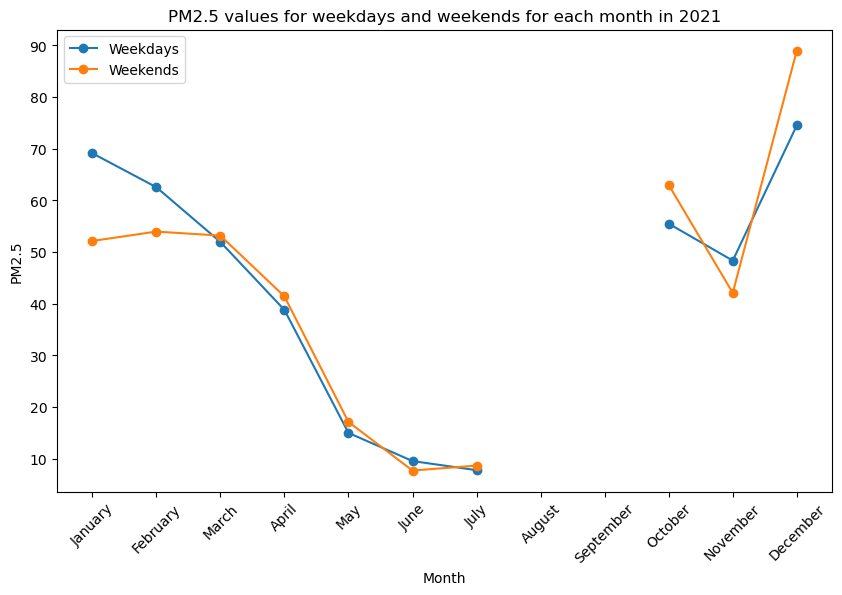

In [19]:
start_date = '2021-01-01'
end_date = '2021-12-31'
date_mask = (cpcp_air_pollution_data['Timestamp'] >= start_date) & (cpcp_air_pollution_data['Timestamp'] <= end_date) & (cpcp_air_pollution_data['station'] == "Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB")
cpcp_air_pollution_data_year_2021 = cpcp_air_pollution_data.loc[date_mask].copy()
cpcp_air_pollution_data_year_2021.loc[:, "day_name"] = cpcp_air_pollution_data_year_2021["Timestamp"].dt.day_name().apply(lambda x: "Weekends" if x in ["Saturday", "Sunday"] else "Weekdays")
cpcp_air_pollution_data_year_2021.loc[:, "month"] = cpcp_air_pollution_data_year_2021["Timestamp"].dt.month_name()
month_order = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
cpcp_air_pollution_data_year_2021['month'] = pd.Categorical(cpcp_air_pollution_data_year_2021['month'], categories=month_order, ordered=True)
cpcp_air_pollution_data_year_2021_pm_values_weekdays_and_weekends = cpcp_air_pollution_data_year_2021.groupby(["month", "day_name"],observed=False).agg({"PM2.5": "mean"})
fig, ax = plt.subplots(figsize=(10, 6))
cpcp_air_pollution_data_year_2021_pm_values_weekdays_and_weekends.unstack().plot(kind='line', ax=ax, marker='o')

ax.set_xticks(range(len(month_order)))
ax.set_xticklabels(month_order, rotation=45)
plt.title("PM2.5 values for weekdays and weekends for each month in 2021")
plt.xlabel("Month")
plt.ylabel("PM2.5")
plt.legend(["Weekdays", "Weekends"])
plt.show()




## Spatial-Temporal Aggregation

#### 1)For each state, calculate the percentage increase or decrease in PM2.5 levels during monsoon months (June to September) compared to summer months (March to May). Which state has the most difference (increase or decrease) for the year 2022?

In [22]:
start_date_monsoon = '2022-06-01'
end_date_monsoon = '2022-09-30'
start_date_summer = '2022-03-01'
end_date_summer = '2022-05-31'
date_mask_monsoon = (cpcp_air_pollution_data['Timestamp'] >= start_date_monsoon) & (cpcp_air_pollution_data['Timestamp'] <= end_date_monsoon)
date_mask_summer = (cpcp_air_pollution_data['Timestamp'] >= start_date_summer) & (cpcp_air_pollution_data['Timestamp'] <= end_date_summer)
cpcp_air_pollution_data_monsoon_2022 = cpcp_air_pollution_data.loc[date_mask_monsoon]
cpcp_air_pollution_data_summer_2022 = cpcp_air_pollution_data.loc[date_mask_summer]
cpcp_air_pollution_data_monsoon_2022_state_groupby = cpcp_air_pollution_data_monsoon_2022.groupby("state")
cpcp_air_pollution_data_summer_2022_state_groupby = cpcp_air_pollution_data_summer_2022.groupby("state")
monsoon_mean = cpcp_air_pollution_data_monsoon_2022_state_groupby.agg({"PM2.5": "mean"})
summer_mean = cpcp_air_pollution_data_summer_2022_state_groupby.agg({"PM2.5": "mean"})
percentage_change = ((monsoon_mean - summer_mean) / summer_mean) * 100
percentage_change = percentage_change.abs()
print(percentage_change.idxmax()["PM2.5"]+" has the highest percentage change in PM2.5 values between summer and monsoon in 2022")


Assam has the highest percentage change in PM2.5 values between summer and monsoon in 2022


#### 2)Plot the average PM2.5 levels for Delhi across each season (Winter: December-February, Summer: March-May, Monsoon: June-September) from 2017 to 2023. What seasonal variation, if any, can you observe in pollution levels?

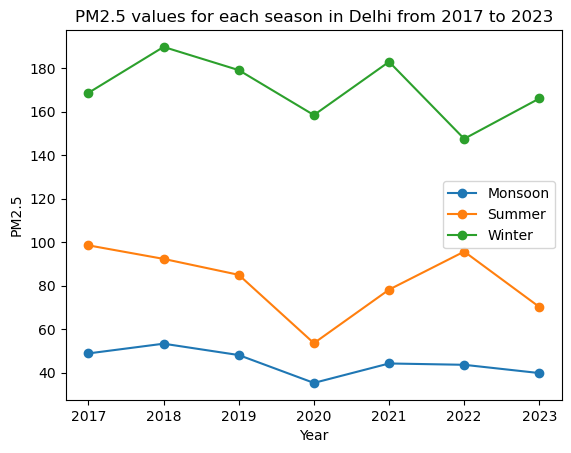

In [24]:

cpcp_air_pollution_data_Delhi_2017_to_2023 = cpcp_air_pollution_data[cpcp_air_pollution_data["state"] == "Delhi"]
cpcp_air_pollution_data_Delhi_2017_to_2023 = cpcp_air_pollution_data_Delhi_2017_to_2023[cpcp_air_pollution_data_Delhi_2017_to_2023["Timestamp"].dt.year.isin(range(2017, 2024))]
cpcp_air_pollution_data_Delhi_2017_to_2023.loc[:, "season"] = cpcp_air_pollution_data_Delhi_2017_to_2023["Timestamp"].dt.month_name().apply(lambda x: "Winter" if x in ["December","January","February"] else "Summer" if x in ["March","April","May"] else "Monsoon" if x in ["June","July","August"] else "NA")
cpcp_air_pollution_data_Delhi_2017_to_2023.loc[:, "year"] = cpcp_air_pollution_data_Delhi_2017_to_2023["Timestamp"].dt.year
cpcp_air_pollution_data_Delhi_2017_to_2023_seasonal=cpcp_air_pollution_data_Delhi_2017_to_2023.groupby(["year", "season"]).agg({"PM2.5": "mean"})
cpcp_air_pollution_data_Delhi_2017_to_2023_seasonal = cpcp_air_pollution_data_Delhi_2017_to_2023_seasonal[cpcp_air_pollution_data_Delhi_2017_to_2023_seasonal.index.get_level_values("season") != "NA"]
cpcp_air_pollution_data_Delhi_2017_to_2023_seasonal = cpcp_air_pollution_data_Delhi_2017_to_2023_seasonal.unstack()
cpcp_air_pollution_data_Delhi_2017_to_2023_seasonal.plot(kind='line', marker='o')
plt.title("PM2.5 values for each season in Delhi from 2017 to 2023")
plt.xlabel("Year")
plt.ylabel("PM2.5")
plt.legend(["Monsoon", "Summer", "Winter"])
plt.show()



The graph shows a dip in pollution levels in 2020, particularly in summer and monsoon, which could be attributed to the COVID-19 lockdowns and the resulting decrease in industrial, transportation, and construction activities. However, winter pollution, despite potential reductions, remained significantly high, highlighting the influence of meteorological factors and agricultural burning.

#### 3)Plot a time-series graph comparing Delhi’s PM2.5 levels with Mumbai’s from 2015 to 2023. Which city had more fluctuations? (Hint: Think what fluctuation means)

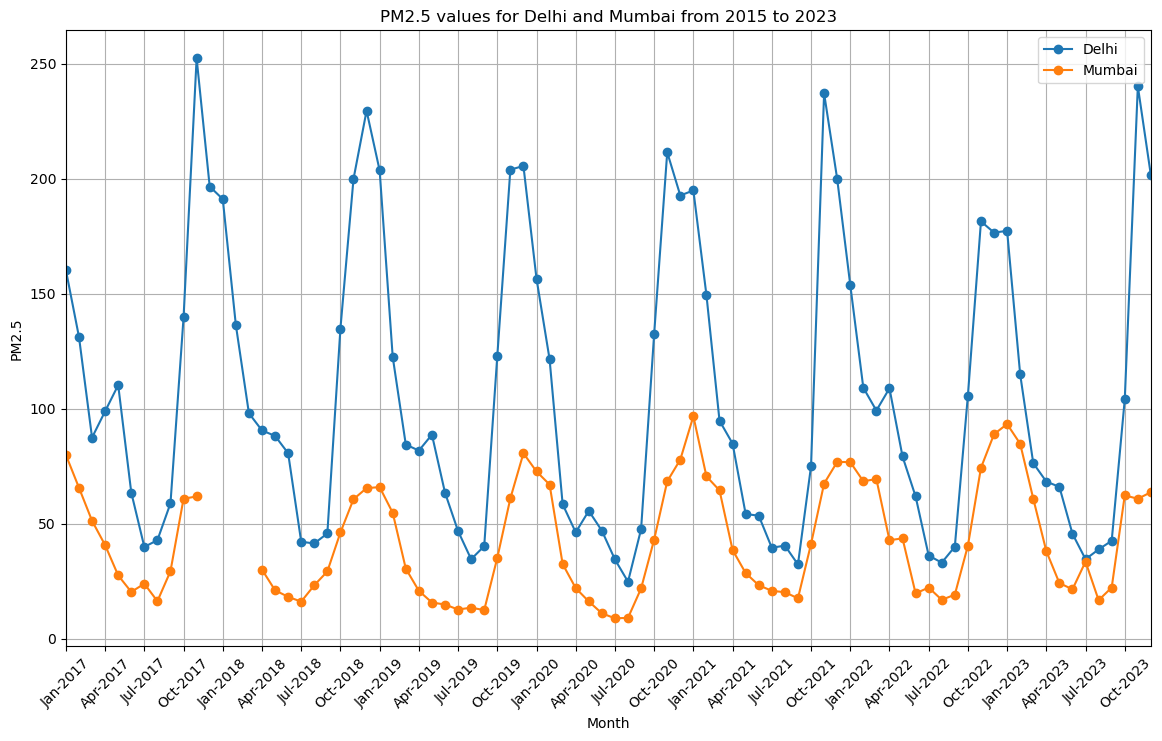

Standard Deviation of PM2.5 for Delhi: 62.975376011853136
Standard Deviation of PM2.5 for Mumbai: 24.5258009141125
Delhi had more fluctuations in PM2.5 levels.


In [27]:
cpcp_air_pollution_data_Delhi_2015_to_2023 = cpcp_air_pollution_data[
    (cpcp_air_pollution_data["city"] == "Delhi") & 
    (cpcp_air_pollution_data["Timestamp"].dt.year.isin(range(2015, 2024)))
]
cpcp_air_pollution_data_Mumbai_2015_to_2023 = cpcp_air_pollution_data[
    (cpcp_air_pollution_data["city"] == "Mumbai") & 
    (cpcp_air_pollution_data["Timestamp"].dt.year.isin(range(2015, 2024)))
]
numeric_columns = ["PM2.5"]
cpcp_air_pollution_data_Delhi_2015_to_2023_monthly = cpcp_air_pollution_data_Delhi_2015_to_2023.set_index('Timestamp')[numeric_columns].resample('ME').mean()
cpcp_air_pollution_data_Mumbai_2015_to_2023_monthly = cpcp_air_pollution_data_Mumbai_2015_to_2023.set_index('Timestamp')[numeric_columns].resample('ME').mean()
fig, ax = plt.subplots(figsize=(14, 8))
cpcp_air_pollution_data_Delhi_2015_to_2023_monthly['PM2.5'].plot(kind='line', ax=ax, marker='o', label='Delhi')
cpcp_air_pollution_data_Mumbai_2015_to_2023_monthly['PM2.5'].plot(kind='line', ax=ax, marker='o', label='Mumbai')
ax.set_xticks(cpcp_air_pollution_data_Delhi_2015_to_2023_monthly.index[::3])
ax.set_xticklabels(cpcp_air_pollution_data_Delhi_2015_to_2023_monthly.index.strftime("%b-%Y")[::3], rotation=45)
plt.title("PM2.5 values for Delhi and Mumbai from 2015 to 2023")
plt.xlabel("Month")
plt.ylabel("PM2.5")
plt.legend()
plt.grid(True)
plt.show()
std_dev_delhi = cpcp_air_pollution_data_Delhi_2015_to_2023_monthly['PM2.5'].std()
std_dev_mumbai = cpcp_air_pollution_data_Mumbai_2015_to_2023_monthly['PM2.5'].std()
print(f"Standard Deviation of PM2.5 for Delhi: {std_dev_delhi}")
print(f"Standard Deviation of PM2.5 for Mumbai: {std_dev_mumbai}")
if std_dev_delhi > std_dev_mumbai:
    print("Delhi had more fluctuations in PM2.5 levels.")
else:
    print("Mumbai had more fluctuations in PM2.5 levels.")

## Population Based

#### 1)Which state in India has the highest number of monitoring stations relative to its population? 

In [30]:
cpcp_air_pollution_data_population_data = cpcp_air_pollution_data.merge(state_data,left_on="state",right_on="State")
cpcp_air_pollution_data_population_data.drop('State', axis=1, inplace=True)
cpcp_air_pollution_data_population_data_groupby = cpcp_air_pollution_data_population_data.groupby("state")
cpcp_air_pollution_data_population_data_groupby_station_population = cpcp_air_pollution_data_population_data_groupby.agg({"station": "count", "Population": "mean"})
cpcp_air_pollution_data_population_data_groupby_station_population["stations_per_population"] = cpcp_air_pollution_data_population_data_groupby_station_population["station"] / cpcp_air_pollution_data_population_data_groupby_station_population["Population"]
print(cpcp_air_pollution_data_population_data_groupby_station_population["stations_per_population"].idxmax()+" has the highest number of stations per population")


Chandigarh has the highest number of stations per population


#### 2)Plot a bar chart showing the top 5 most polluted states in terms of per capita PM2.5 exposure in 2023.

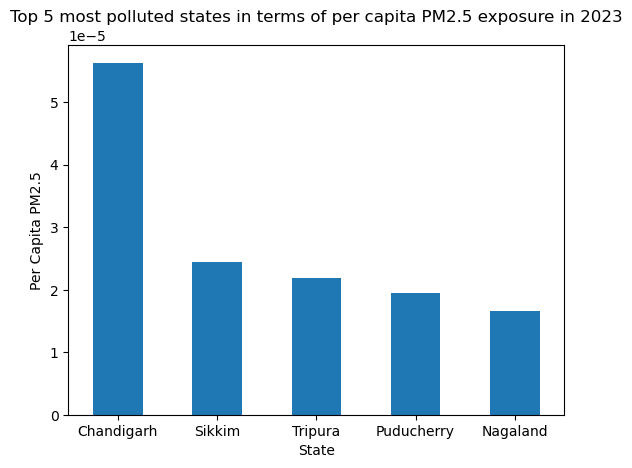

In [32]:
cpcp_air_pollution_data_population_data_2023 = cpcp_air_pollution_data_population_data[cpcp_air_pollution_data_population_data["Timestamp"].dt.year == 2023]
cpcp_air_pollution_data_population_data_2023_groupby = cpcp_air_pollution_data_population_data_2023.groupby("state")
cpcp_air_pollution_data_population_data_2023_groupby_per_capita_pm = cpcp_air_pollution_data_population_data_2023_groupby.agg({"PM2.5": "mean", "Population": "mean"})
cpcp_air_pollution_data_population_data_2023_groupby_per_capita_pm["per_capita_pm"] = cpcp_air_pollution_data_population_data_2023_groupby_per_capita_pm["PM2.5"] / cpcp_air_pollution_data_population_data_2023_groupby_per_capita_pm["Population"]
cpcp_air_pollution_data_population_data_2023_groupby_per_capita_pm = cpcp_air_pollution_data_population_data_2023_groupby_per_capita_pm.sort_values("per_capita_pm", ascending=False).head(5)
cpcp_air_pollution_data_population_data_2023_groupby_per_capita_pm["per_capita_pm"].plot(kind='bar')
plt.title("Top 5 most polluted states in terms of per capita PM2.5 exposure in 2023")
plt.xlabel("State")
plt.ylabel("Per Capita PM2.5")
plt.xticks(rotation=0)
plt.show()

#### 3)Plot the relationship between population density and average PM2.5 concentration for each state. What conclusion can you draw about the correlation between population density and pollution?
- X-axis: Population density (people per square kilometer).
- Y-axis: Average PM2.5 concentration.
- Use a scatter plot to show the relationship, where each point represents a state.


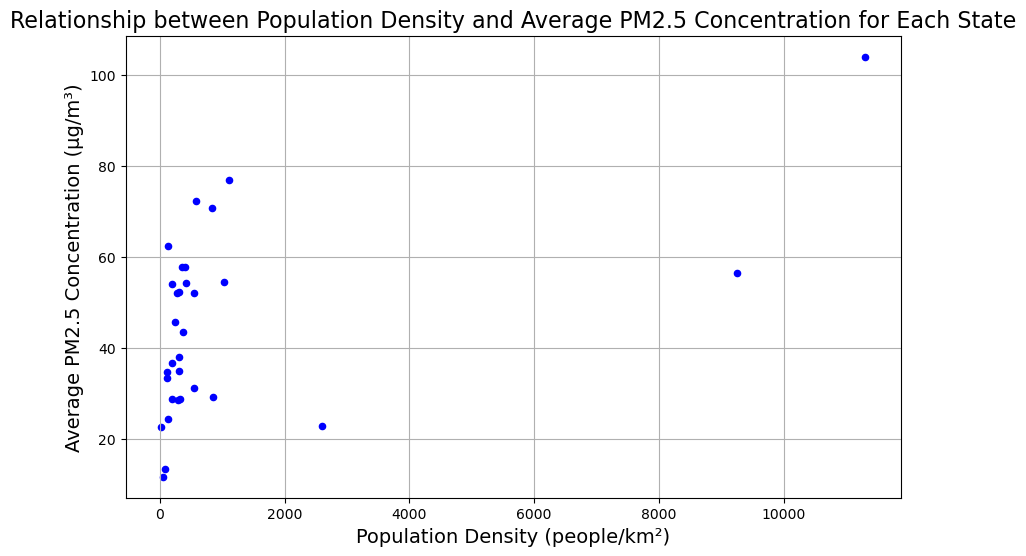

In [34]:
cpcp_air_pollution_data_population_data_groupby_population_density = cpcp_air_pollution_data_population_data_groupby.agg({
    "Population": "mean",
    "Area (km2)": "mean"
})
cpcp_air_pollution_data_population_data_groupby_population_density["population_density"] = cpcp_air_pollution_data_population_data_groupby_population_density["Population"] / cpcp_air_pollution_data_population_data_groupby_population_density["Area (km2)"]
pm25_avg = cpcp_air_pollution_data_population_data_groupby.agg({"PM2.5": "mean"}).rename(columns={"PM2.5": "avg_PM2.5"})
merged_data = cpcp_air_pollution_data_population_data_groupby_population_density[["population_density"]].merge(
    pm25_avg, left_index=True, right_index=True
)
merged_data.plot(kind='scatter', x='population_density', y='avg_PM2.5', figsize=(10, 6), color='blue')
plt.title("Relationship between Population Density and Average PM2.5 Concentration for Each State", fontsize=16)
plt.xlabel("Population Density (people/km²)", fontsize=14)
plt.ylabel("Average PM2.5 Concentration (μg/m³)", fontsize=14)
plt.grid(True)
plt.show()


## Area Based

### 1) Which state has the highest PM2.5 concentration per square kilometer? Plot the pollution levels for all states relative to their area. 
- X-axis: States.
- Y-axis: PM2.5 concentration per square kilometer.
- Use a bar plot where each bar represents a state, and the height shows PM2.5 per sq km.

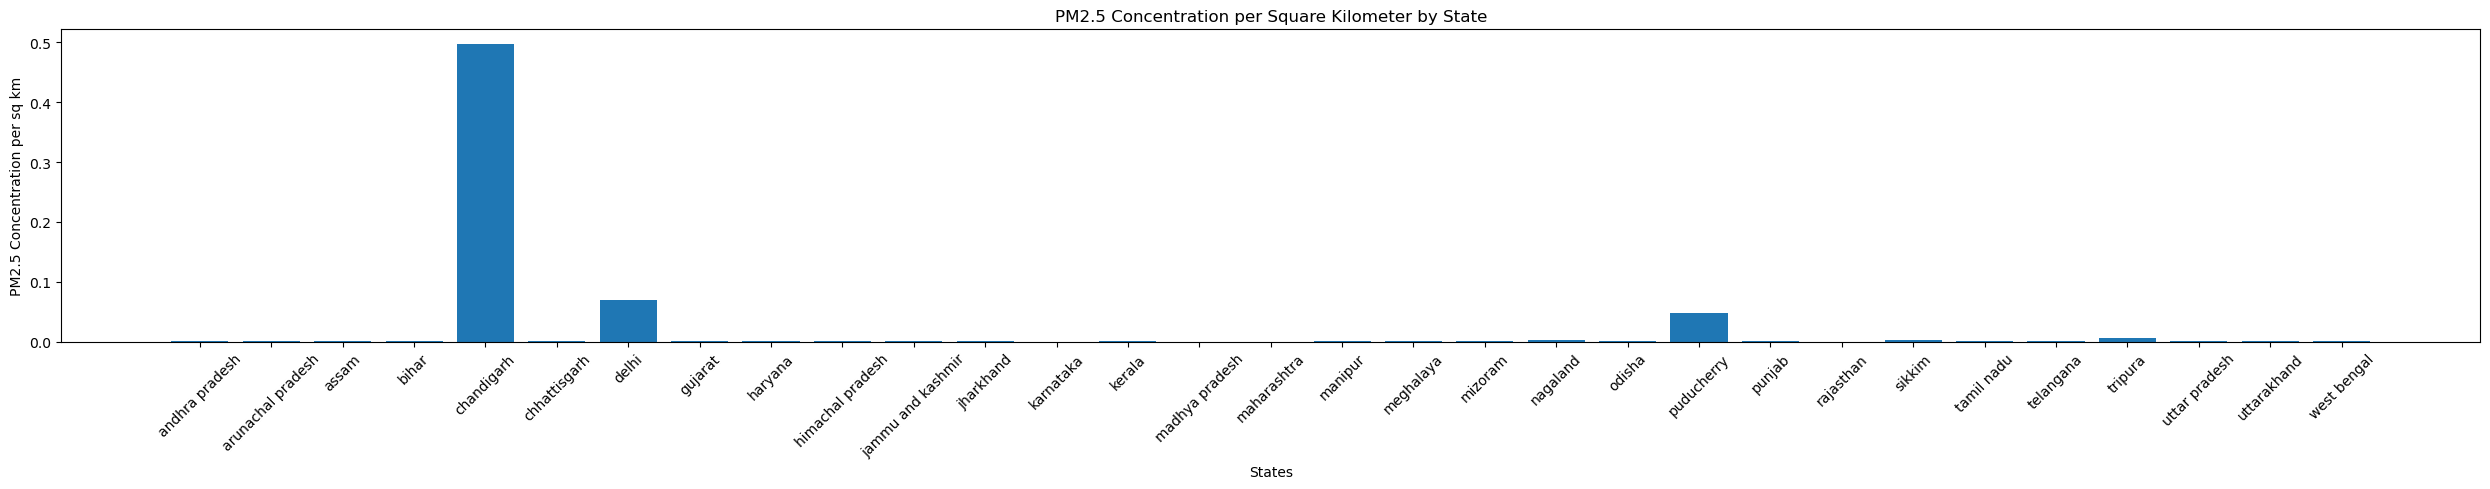

In [37]:
cpcp_air_pollution_data_population_data_groupby_PM25 = (cpcp_air_pollution_data_population_data_groupby.agg({'PM2.5': 'mean'}).reset_index())

cpcp_air_pollution_data_population_data_groupby_PM25['state'] = (cpcp_air_pollution_data_population_data_groupby_PM25['state'].str.lower())

state_data_sorted = state_data.copy()
state_data_sorted['State'] = state_data_sorted['State'].str.lower()
state_data_sorted.set_index('State', inplace = True)
state_data_sorted = state_data_sorted.sort_index()

cpcp_air_pollution_data_population_data_groupby_PM25.set_index('state', inplace = True)

cpcp_air_pollution_data_population_data_groupby_PM25['PM25 per sqkm'] = (cpcp_air_pollution_data_population_data_groupby_PM25['PM2.5'] / state_data_sorted['Area (km2)'])

plt.figure(figsize=(25, 5))
plt.bar(cpcp_air_pollution_data_population_data_groupby_PM25.index, cpcp_air_pollution_data_population_data_groupby_PM25['PM25 per sqkm'])

plt.xlabel('States')
plt.ylabel('PM2.5 Concentration per sq km')
plt.title('PM2.5 Concentration per Square Kilometer by State')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 2) Compare the total number of monitoring stations per square kilometer in each state. Identify the state with the highest density of monitoring stations relative to its area. Show a bar plot where each bar represents a state, and the height shows the number of monitoring stations per square kilometer.

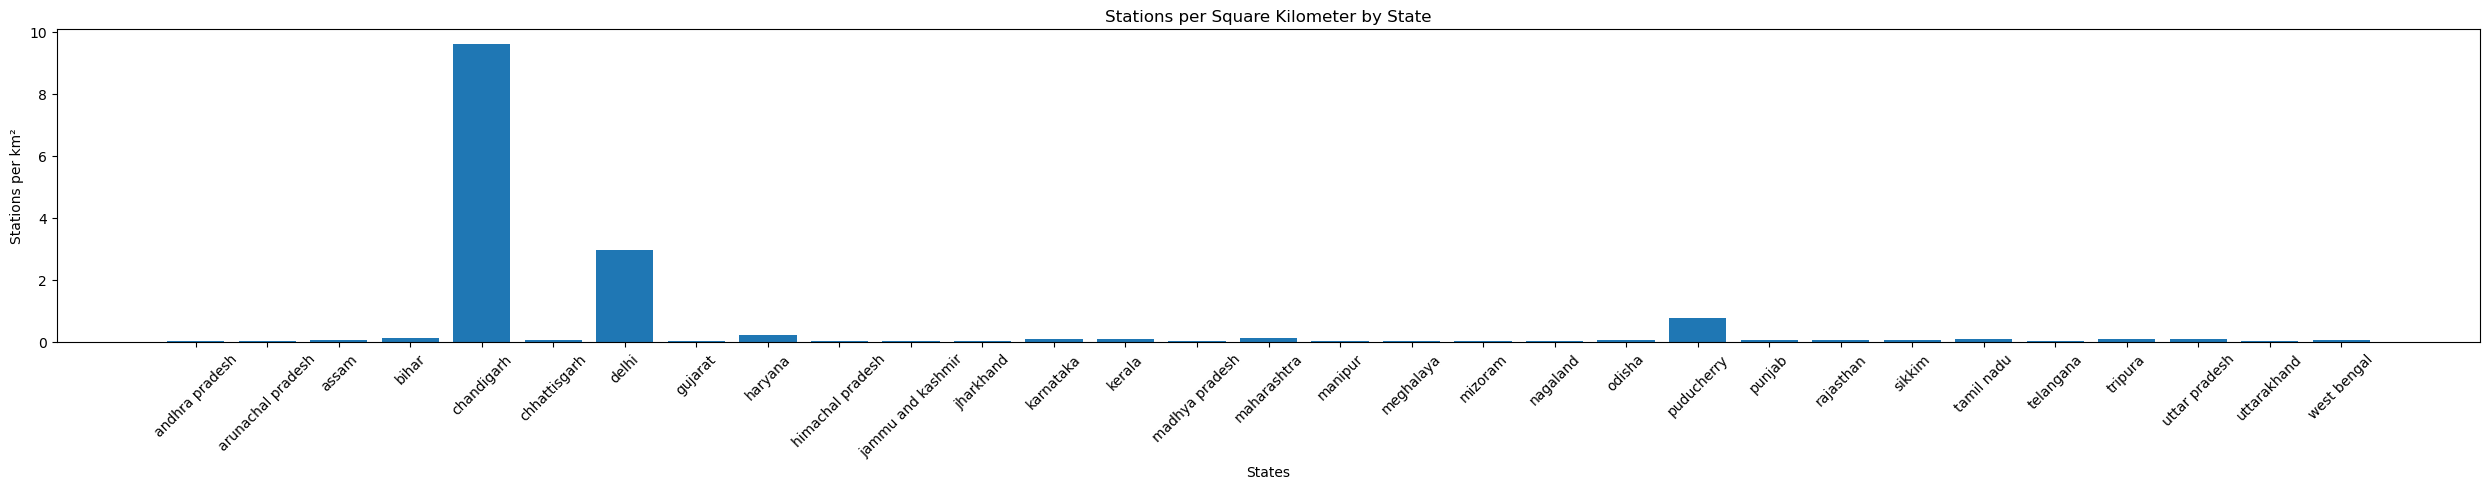

In [39]:
cpcp_air_pollution_data_population_data_groupby_count = (cpcp_air_pollution_data_population_data_2023_groupby.agg({'address': 'count'}).reset_index())
cpcp_air_pollution_data_population_data_groupby_count['state'] = (cpcp_air_pollution_data_population_data_groupby_count['state'].str.lower())

state_data_sorted = state_data.copy()
state_data_sorted['State'] = state_data_sorted['State'].str.lower()
state_data_sorted.set_index('State', inplace = True)
state_data_sorted = state_data_sorted.sort_index()

cpcp_air_pollution_data_population_data_groupby_count.set_index('state', inplace=True)
cpcp_air_pollution_data_population_data_groupby_count['stations_per_km2'] = (cpcp_air_pollution_data_population_data_groupby_count['address'] / state_data_sorted['Area (km2)'])

plt.figure(figsize=(25, 5))
plt.bar(cpcp_air_pollution_data_population_data_groupby_count.index,cpcp_air_pollution_data_population_data_groupby_count['stations_per_km2'])

plt.xlabel('States')
plt.ylabel('Stations per km²')
plt.title('Stations per Square Kilometer by State')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 3) Compare the average PM2.5 levels between Maharashtra and Madhya Pradesh over the year 2021. Given that both states have similar area sizes but different population densities, analyze how population density impacts pollution levels in these two states.

In [41]:
display(cpcp_air_pollution_data_population_data_groupby_PM25.loc['maharashtra'])
display(cpcp_air_pollution_data_population_data_groupby_PM25.loc['madhya pradesh'])

PM2.5            43.491415
PM25 per sqkm     0.000141
Name: maharashtra, dtype: float64

PM2.5            45.874375
PM25 per sqkm     0.000149
Name: madhya pradesh, dtype: float64

While population density influences pollution levels, other factors like industrial activity, vehicle emissions, and agricultural practices play a crucial role. Despite Maharashtra having many urban centers, Madhya Pradesh’s slightly higher PM2.5 suggests that pollution is not solely dependent on population density but also on regional pollution sources and dispersion conditions.

## Funding Based

### 1) Compare the average PM2.5 levels between states that received NCAP funding and those that did not in 2021.

In [45]:
cpcp_air_pollution_data["Timestamp"] = pd.to_datetime(cpcp_air_pollution_data["Timestamp"], errors="coerce")
data_2021 = cpcp_air_pollution_data[cpcp_air_pollution_data["Timestamp"].dt.year == 2021]

pm25_avg_by_state = data_2021.groupby("state")["PM2.5"].mean().reset_index()

funding_df_filtered = ncap_funding_data[ncap_funding_data["Amount released during FY 2021-22"] != "-"]
funded_states = set(funding_df_filtered["State"].str.strip())

pm25_avg_by_state["NCAP_Funded"] = pm25_avg_by_state["state"].str.strip().isin(funded_states)
pm25_comparison = pm25_avg_by_state.groupby("NCAP_Funded")["PM2.5"].mean()
pm25_comparison.index = pm25_comparison.index.map({True: "Funded States", False: "Non-Funded States"})


print(pm25_comparison)

NCAP_Funded
Non-Funded States    40.676853
Funded States        49.251559
Name: PM2.5, dtype: float64


### 2) Create a time series plot showing PM2.5 levels with an increment in NCAP funding for Assam. Has an increment of the financing led to noticeable improvements in air quality?


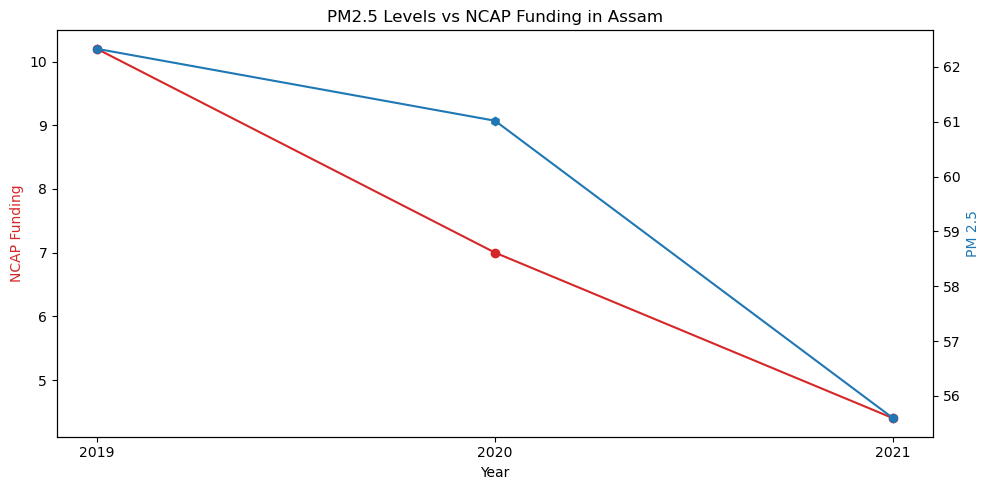

In [47]:
cpcp_air_pollution_data_Assam = cpcp_air_pollution_data[
    (cpcp_air_pollution_data["state"] == "Assam") &                       
    (cpcp_air_pollution_data["Timestamp"].dt.year.isin(range(2018, 2023)))]
cpcp_air_pollution_data_Assam_yearly = cpcp_air_pollution_data_Assam.set_index('Timestamp')[numeric_columns].resample('YE').mean()


columns_to_conv = ['Amount released during FY 2019-20', 'Amount released during FY 2020-21', 'Amount released during FY 2021-22']
ncap_funding_data[columns_to_conv] = ncap_funding_data[columns_to_conv].apply(pd.to_numeric, errors='coerce')
ncap_funding_State = ncap_funding_data.groupby('State')[['Amount released during FY 2019-20', 'Amount released during FY 2020-21', 
                                        'Amount released during FY 2021-22']].agg(['sum'])
year = ['2019', '2020', '2021']

fig, ax1 = plt.subplots(figsize=(10, 5))

ax1.set_xlabel('Year')
ax1.set_ylabel('NCAP Funding', color='tab:red')
ax1.plot(year, ncap_funding_State.iloc[2], marker = 'o', linestyle='-', color='tab:red')

ax2 = ax1.twinx()
ax2.set_ylabel('PM 2.5', color='tab:blue')
ax2.plot(year, cpcp_air_pollution_data_Assam_yearly.iloc[[2,3,4]], marker = 'h' )

plt.title('PM2.5 Levels vs NCAP Funding in Assam')
fig.tight_layout()
plt.show()

### 3) Create a scatter plot to showcase the area versus funding received by a state. Mark every state with a different color and show the legend outside the plot.


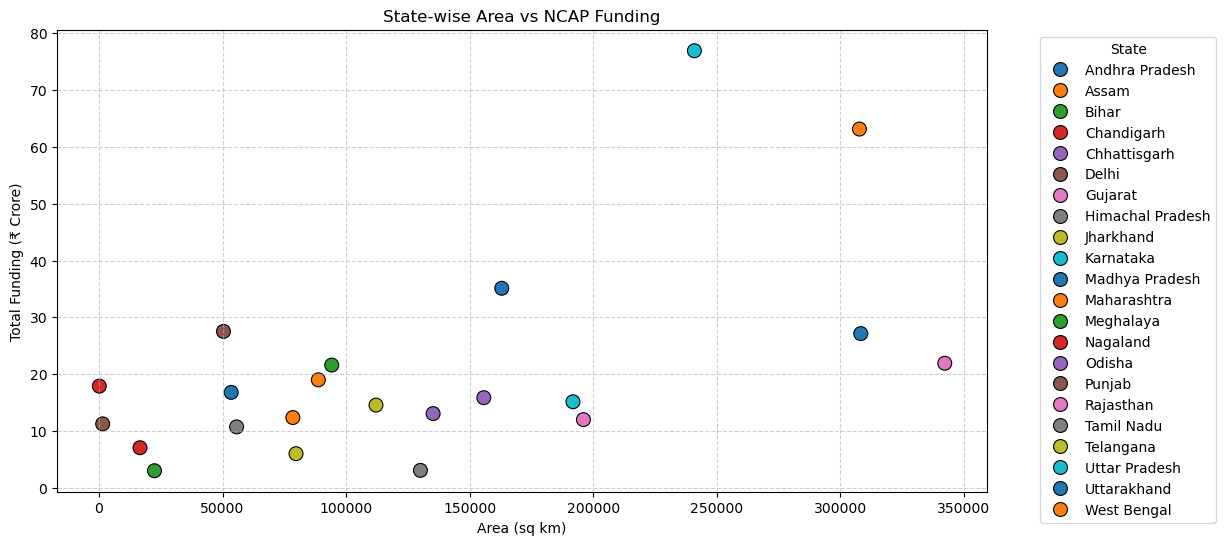

In [49]:
import seaborn as sns

ncap_funding_data.columns = ncap_funding_data.columns.str.strip().str.lower()
state_data.columns = state_data.columns.str.strip().str.lower()

ncap_funding_data = ncap_funding_data.rename(columns={"total fund released": "total funding"})
state_data = state_data.rename(columns={"area (km2)": "area (sq km)"})

ncap_funding_data = ncap_funding_data.groupby("state", as_index=False)["total funding"].sum()

merged_data = pd.merge(ncap_funding_data, state_data, on="state", how="inner")

if "area (sq km)" in merged_data.columns and "total funding" in merged_data.columns:
    merged_data = merged_data[["state", "area (sq km)", "total funding"]].dropna()
    merged_data["total funding"] = pd.to_numeric(merged_data["total funding"], errors="coerce")
    merged_data["area (sq km)"] = pd.to_numeric(merged_data["area (sq km)"], errors="coerce")

    plt.figure(figsize=(12, 6))
    sns.scatterplot(
        data=merged_data, 
        x="area (sq km)", 
        y="total funding", 
        hue="state", 
        palette="tab10", 
        s=100, 
        edgecolor="black"
    )

    plt.xlabel("Area (sq km)")
    plt.ylabel("Total Funding (₹ Crore)")
    plt.title("State-wise Area vs NCAP Funding")
    plt.legend(title="State", bbox_to_anchor=(1.05, 1), loc="upper left")
    plt.grid(True, linestyle="--", alpha=0.6)

    plt.show()

## Miscellaneous Questions

### 1) For the most polluted city in 2023 (highest average pollution in 2023), calculate the percentage of days with PM2.5 levels above the hazardous threshold (300 µg/m³)

In [52]:
cpcp_air_pollution_data['city'] = cpcp_air_pollution_data['city'].str.lower()

cpcp_air_pollution_data['Timestamp'] = cpcp_air_pollution_data['Timestamp'].astype(str)

cpcp_air_pollution_data_2023 = cpcp_air_pollution_data[
    cpcp_air_pollution_data['Timestamp'].str.contains("2023")
]

avg_pm25_city = (
    cpcp_air_pollution_data_2023.groupby('city')['PM2.5']
    .mean()
    .reset_index()
)

most_polluted_city = avg_pm25_city.sort_values(by='PM2.5', ascending=False).iloc[0]['city']

most_polluted_city_data = cpcp_air_pollution_data_2023[cpcp_air_pollution_data_2023['city'] == most_polluted_city].copy()

most_polluted_city_data['PM2.5'] = most_polluted_city_data['PM2.5'].astype(float)
hazardous_days = most_polluted_city_data[most_polluted_city_data['PM2.5'] > 300]['Timestamp'].nunique()

total_days = most_polluted_city_data['Timestamp'].nunique()

percentage_hazardous_days = (hazardous_days / total_days) * 100

print(f"Most Polluted City in 2023: {most_polluted_city.capitalize()}")
print(f"Percentage of Hazardous Days: {percentage_hazardous_days:.2f}%")

Most Polluted City in 2023: Darbhanga
Percentage of Hazardous Days: 0.82%


### 2) Analyze the PM2.5 levels in Delhi during Diwali (October-November) and New Year compared to regular months over the 3 years (2018-2020). Do you observe any significant pollution spikes during these festivals? If spikes are observed, Can you mark these spikes using arrows?

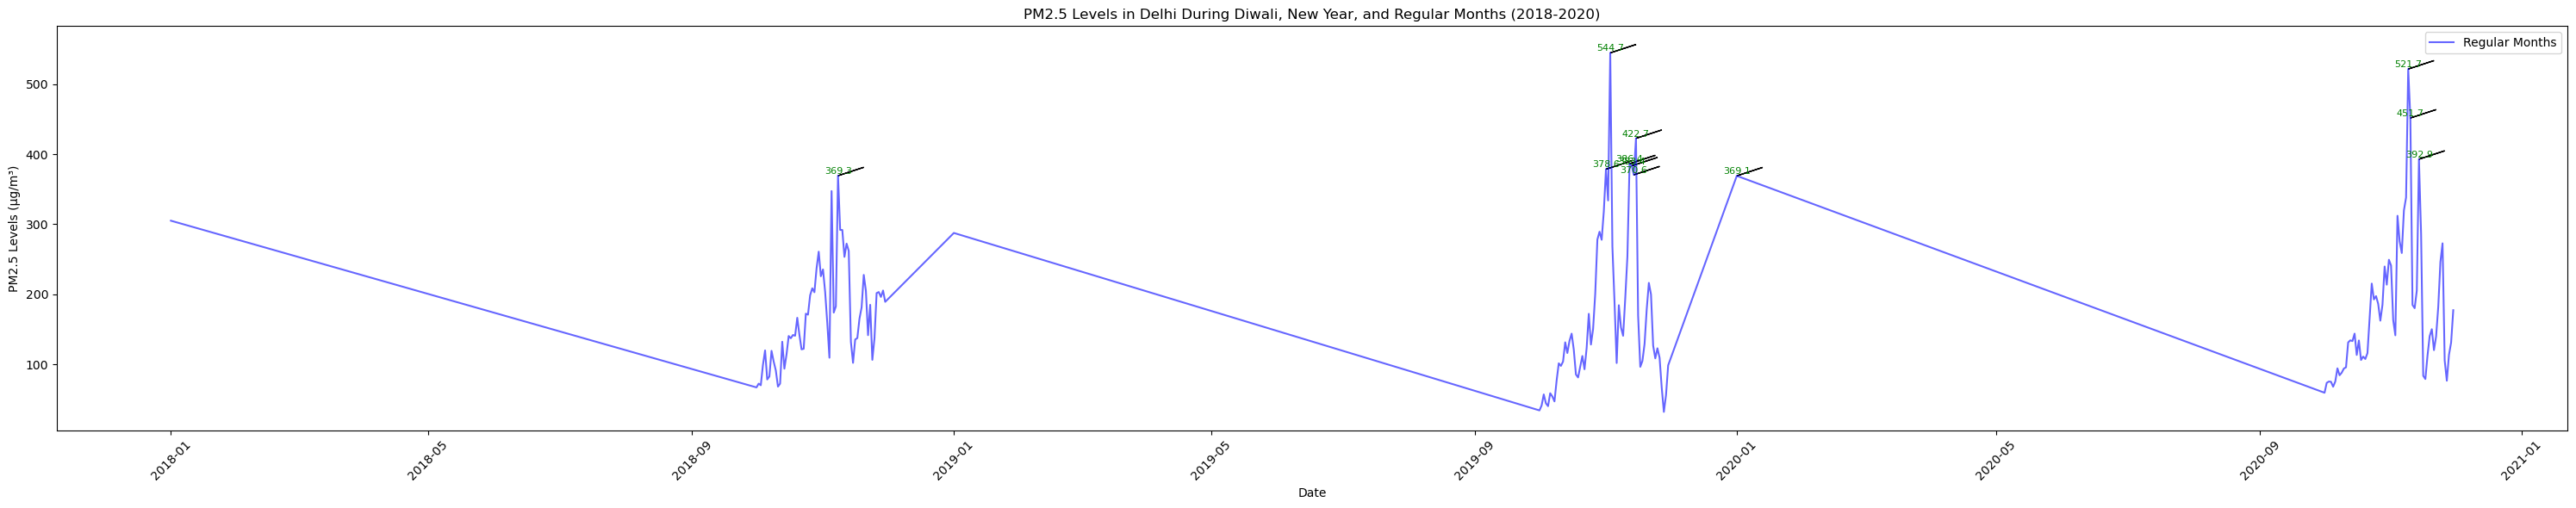


PM2.5 levels in Delhi during Diwali (October-November) and New Year (December-January) tend to show significant pollution spikes compared 
to regular months. In Diwali (October-November) firecrackers, stubble burning, and weather conditions lead to major spikes in PM2.5, while in New Year 
(December-January) fireworks, winter inversion, and low wind speed often cause air quality deterioration.


In [54]:
cpcp_air_pollution_data.columns = cpcp_air_pollution_data.columns.str.strip()

cpcp_air_pollution_data["Timestamp"] = pd.to_datetime(cpcp_air_pollution_data["Timestamp"], errors="coerce")

cpcp_air_pollution_data["Date"] = cpcp_air_pollution_data["Timestamp"].dt.date  

cpcp_air_pollution_data["year"] = cpcp_air_pollution_data["Timestamp"].dt.year
cpcp_air_pollution_data["month"] = cpcp_air_pollution_data["Timestamp"].dt.month
cpcp_air_pollution_data["day"] = cpcp_air_pollution_data["Timestamp"].dt.day

delhi_data = cpcp_air_pollution_data[cpcp_air_pollution_data["city"].str.strip().str.lower() == "delhi"]

filtered_data = delhi_data[
    ((delhi_data["year"] >= 2018) & (delhi_data["year"] <= 2020)) & 
    ((delhi_data["month"].isin([10, 11])) |  
     ((delhi_data["month"] == 1) & (delhi_data["day"] == 1))) 
]

grouped_data = filtered_data.groupby("Date", as_index=False)["PM2.5"].mean()


plt.figure(figsize=(30, 6))
plt.plot(grouped_data["Date"], grouped_data["PM2.5"], label="Regular Months", color='blue', alpha=0.6)

for index, row in grouped_data.iterrows():
    if row['PM2.5'] > 350:  
        plt.text(row['Date'], row['PM2.5'], f'{row["PM2.5"]:.1f}', 
                 fontsize=8, ha='center', va='bottom', color='green')
        plt.arrow(row['Date'], row['PM2.5'],12,12)

plt.title("PM2.5 Levels in Delhi During Diwali, New Year, and Regular Months (2018-2020)")
plt.xlabel("Date")
plt.ylabel("PM2.5 Levels (µg/m³)")
plt.legend()


plt.xticks(rotation=45)


plt.tight_layout()
plt.show()

print('''\nPM2.5 levels in Delhi during Diwali (October-November) and New Year (December-January) tend to show significant pollution spikes compared 
to regular months. In Diwali (October-November) firecrackers, stubble burning, and weather conditions lead to major spikes in PM2.5, while in New Year 
(December-January) fireworks, winter inversion, and low wind speed often cause air quality deterioration.''')

### 3) Identify the state that received the highest NCAP funding in 2020 and determine if its air pollution levels improved significantly by 2023. Use a line graph to compare yearly average PM2.5 trends.

In [56]:
print(ncap_funding_State[('Amount released during FY 2020-21', 'sum')].idxmax(), 'recieved the highest NCAP funding in 2020.')

Andhra Pradesh recieved the highest NCAP funding in 2020.


In [57]:
cpcp_air_pollution_data_Andhra = cpcp_air_pollution_data[
    (cpcp_air_pollution_data["state"] == "Andhra Pradesh") &                       
    (cpcp_air_pollution_data["Timestamp"].dt.year.isin(range(2019, 2024)))]
cpcp_air_pollution_data_Andhra_yearly = cpcp_air_pollution_data_Andhra.set_index('Timestamp')[numeric_columns].resample('YE').mean()
display(cpcp_air_pollution_data_Andhra_yearly)
print('''Air quality has decreased significanlty (approx. 20%)  after 2020 till 2023''')
print(cpcp_air_pollution_data_Andhra_yearly.columns)

,PM2.5
Timestamp,
2019-12-31,33.899712
2020-12-31,30.425130
2021-12-31,33.316491
2022-12-31,34.334527
2023-12-31,36.294259


Air quality has decreased significanlty (approx. 20%)  after 2020 till 2023
Index(['PM2.5'], dtype='object')


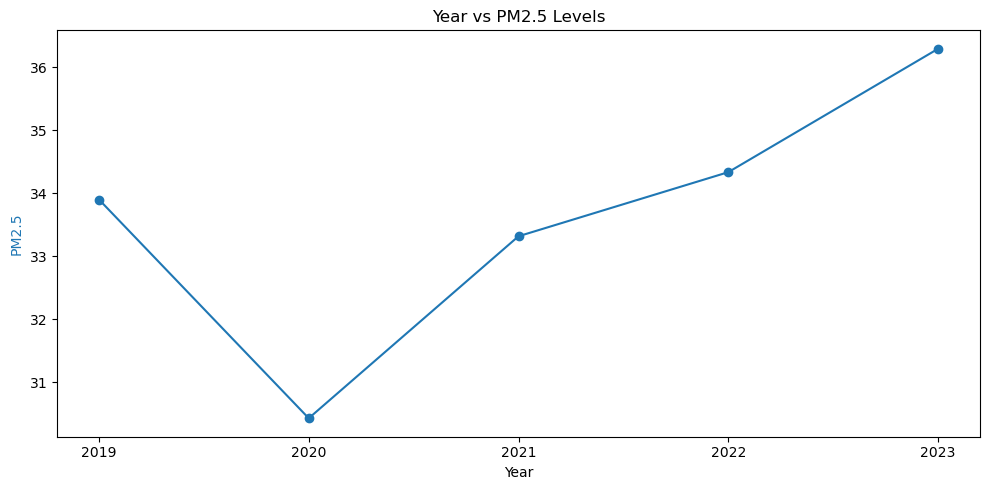

In [58]:
fig, ax1 = plt.subplots(figsize=(10, 5))

ax1.set_xlabel('Year')
ax1.set_ylabel('PM2.5', color='tab:blue')
ax1.plot(['2019', '2020', '2021', '2022', '2023'], cpcp_air_pollution_data_Andhra_yearly['PM2.5'], marker = 'o', linestyle = '-', color = 'tab:blue')

plt.title('Year vs PM2.5 Levels')
fig.tight_layout()
plt.show()

### 4) Draw the map of India and plot the sensor locations on the map.

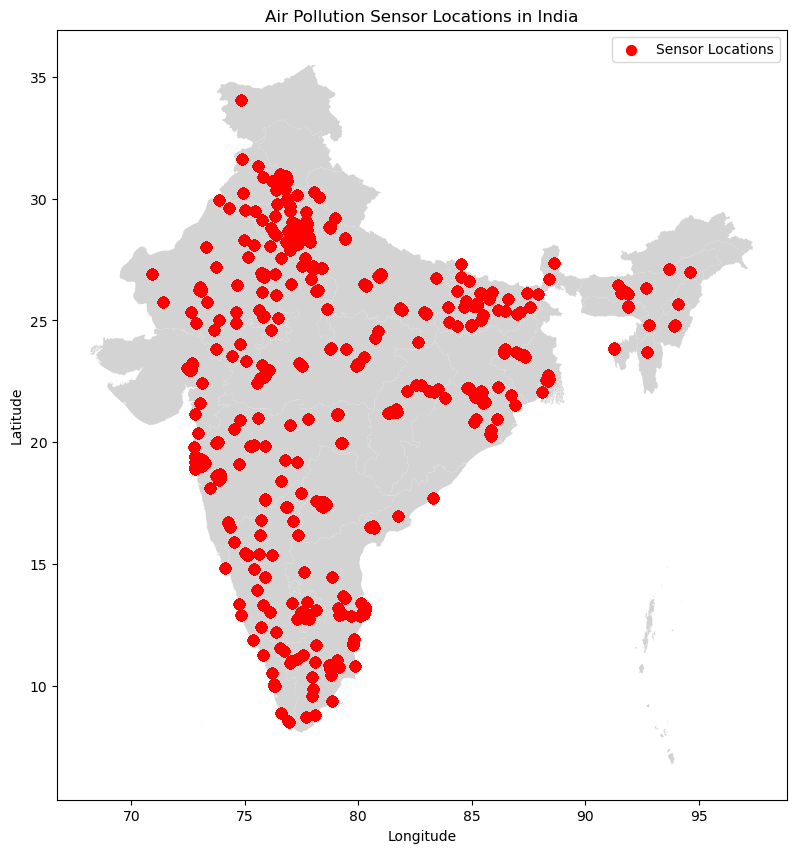

In [60]:
import geopandas
map_plot_data = cpcp_air_pollution_data.copy()
map_plot_data['latitude'] =  pd.to_numeric(map_plot_data['latitude'], errors='coerce')
map_plot_data['longitude'] =  pd.to_numeric(map_plot_data['longitude'], errors='coerce')
map_plot_data = map_plot_data.dropna(subset=['latitude', 'longitude'])
gdf = geopandas.GeoDataFrame(
    map_plot_data,
    geometry=geopandas.points_from_xy(map_plot_data.longitude, map_plot_data.latitude),
    crs='EPSG:4326',
)  
india = geopandas.read_file('Data/gadm41_IND_shp/gadm41_IND_1.shp')  
india = india.to_crs(
    'EPSG:4326'
)  


fig, ax = plt.subplots(1, figsize=(10, 10))
india.plot(color='lightgray', ax=ax)  # Plot India map
gdf.plot(ax=ax, color='red', markersize=50, label='Sensor Locations')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Air Pollution Sensor Locations in India')
ax.legend()

plt.show()

## Tell us something new:
### Tell us something interesting from the dataset that we have not asked. Anything that intrigues you, anything that might be useful to the policymakers. 


In [62]:
cpcp_air_pollution_data["Timestamp"] = pd.to_datetime(cpcp_air_pollution_data["Timestamp"])
cpcp_air_pollution_data['Year'] = cpcp_air_pollution_data['Timestamp'].dt.year
state_yearly_pm25 = cpcp_air_pollution_data.groupby(['state', 'Year'])['PM2.5'].mean().reset_index()
def calculate_percentage_change(df):
    if len(df) < 2:
        return np.nan
    first_pm25 = df['PM2.5'].iloc[0]
    last_pm25 = df['PM2.5'].iloc[-1]
    return ((last_pm25 - first_pm25) / first_pm25) * 100

state_pm25_change = state_yearly_pm25.groupby('state').apply(calculate_percentage_change,include_groups=False).reset_index(name='PM2.5_Change')
merged_data = pd.merge(state_pm25_change, ncap_funding_data, on='state', how='inner')
correlation = merged_data['PM2.5_Change'].corr(merged_data['total funding'])
print(f"Correlation between PM2.5 change and NCAP funding: {correlation}")

Correlation between PM2.5 change and NCAP funding: 0.007755408947100558


The correlation coefficient is 0.007755408947100558, which is very close to 0. This implies that there is virtually no linear correlation between the amount of NCAP funding and the percentage change in PM2.5 levels. In other words, based on this data, there's no evidence to suggest that more NCAP funding leads to a significant reduction in PM2.5 levels, or vice versa.